## Data Preprocessing Part

In [51]:
import pandas as pd

data = pd.read_pickle("C://Users/isang/OneDrive/Desktop/WM/data/LSWMD.pkl")
data.shape

(811457, 6)

In [52]:
data.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [54]:
data['failureType'].map(lambda x: list(x)!=[]).sum()

172950

In [55]:
data_unlabelled = pd.DataFrame()
data_unlabelled = data[data['failureType'].map(lambda x: list(x)==[])]
     
data_unlabelled.shape

(638507, 6)

In [56]:
data_unlabelled.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
35,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,11.0,[],[]
45,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,21.0,[],[]
69,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot3,20.0,[],[]
120,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,21.0,[],[]
158,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2,...",533.0,lot7,9.0,[],[]


In [57]:
data_labelled = pd.DataFrame()
data_labelled = data[data['failureType'].map(lambda x: list(x)!=[])]

print(data_labelled.shape)

data_labelled.head()

(172950, 6)


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [58]:
data_labelled['failureType'] = data_labelled['failureType'].map(lambda x: x[0][0])
data_labelled['trianTestLabel'] = data_labelled['trianTestLabel'].map(lambda x: x[0][0])
data_labelled.rename(columns = {'trianTestLabel':'trainTestLabel'}, inplace = True)

data_labelled.head()

C:\Users\isang\AppData\Local\Temp\ipykernel_29848\3659585696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labelled['failureType'] = data_labelled['failureType'].map(lambda x: x[0][0])
C:\Users\isang\AppData\Local\Temp\ipykernel_29848\3659585696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_labelled['trianTestLabel'] = data_labelled['trianTestLabel'].map(lambda x: x[0][0])
C:\Users\isang\AppData\Local\Temp\ipykernel_29848\3659585696.py:3: SettingWithCopyWarning: 
A value is trying to b

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,Training,none
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,Training,none
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,Training,none
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,Training,none
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,Training,none


## Data Analysis Part

In [59]:
number_labelled_data = data_labelled.shape[0]

failure_types = list(pd.unique(data_labelled['failureType']))
failure_types

['none',
 'Loc',
 'Edge-Loc',
 'Center',
 'Edge-Ring',
 'Scratch',
 'Random',
 'Near-full',
 'Donut']

[147431, 3593, 5189, 4294, 9680, 1193, 866, 149, 555]
[0.852, 0.021, 0.03, 0.025, 0.056, 0.007, 0.005, 0.001, 0.003]


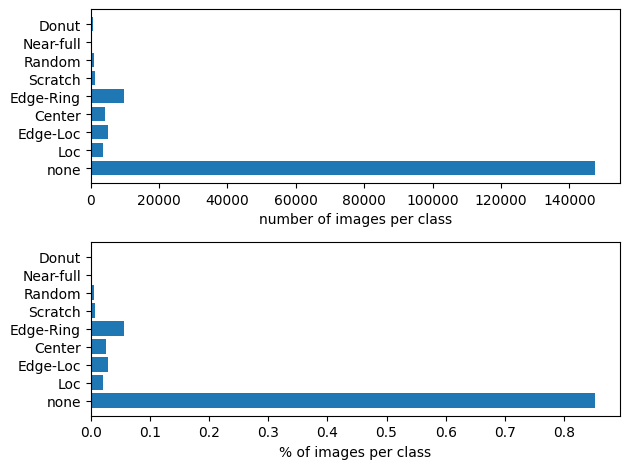

In [60]:
import matplotlib.pyplot as plt

types_image_number = list(map(lambda x: (data_labelled['failureType'] == x).sum(), 
                              failure_types))
print(types_image_number)


types_image_proportion = list(map(lambda x: round(x/number_labelled_data,3), types_image_number))
print(types_image_proportion)


plt.subplot(2,1,1)
plt.barh(failure_types, types_image_number)
plt.xlabel('number of images per class')

plt.subplot(2,1,2)
plt.barh(failure_types, types_image_proportion)
plt.xlabel('% of images per class')

plt.tight_layout()

Text(0.5, 0, 'Images per class')

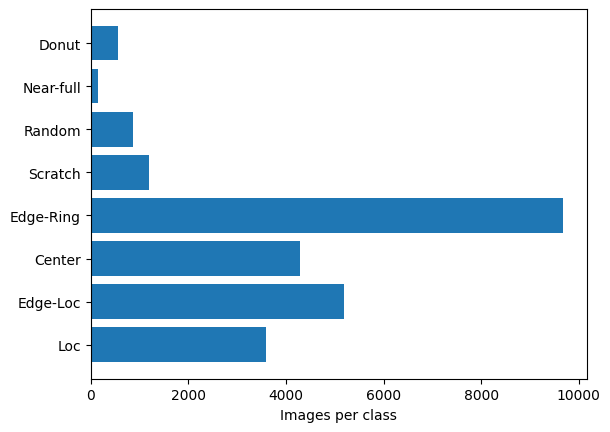

In [61]:
plt.barh(failure_types[1:], types_image_number[1:])
plt.xlabel('Images per class')